### 사용한 모듈

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

각종 옵션

In [5]:
pd.options.display.max_rows = 100
pd.options.display.max_info_columns =200

# 한글폰트 깨짐 방지
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='darkgrid')
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# 실수 표현 옵션
pd.options.display.float_format = '{:.1f}'.format
pd.options.display.float_format = '{:,}'.format

 자료 가져오기

In [6]:
url = 'C:\Mini-pjt\\fc_data.xlsx'
data = pd.read_excel(url)

### 분석 자료의 기본 정보 확인

In [7]:
df = data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

Domain이 문자이고 고유 값들의 분류값이 작은 Column의 고유값

In [8]:
df['course_title'].unique()

array(['올인원 패키지 : 알고리즘 기술면접 완전 정복', '초격차 패키지 : 한번에 끝내는 영상 촬영과 편집',
       '시크릿코드 : 프론트엔드 실무 완성편', ..., '(B2B) 그린오션스 온라인 구독 올 플랜 - 비대면바우처',
       '(B2B) 디캠프 패밀리사 온라인 구독 올 플랜 (9월)',
       '(B2B) (주)오디 온라인 구독 올 플랜 - 비대면바우처'], dtype=object)

In [9]:
df['category_title'].unique()

array(['프로그래밍', '영상/3D', '업무 생산성', '크리에이티브', '부동산/금융', '데이터사이언스', '디자인',
       '마케팅', '교육', '투자/재테크', nan, '관리', '데이터 사이언스', '비즈니스', '지식콘텐츠',
       '일러스트', '파이낸스'], dtype=object)

In [10]:
df['category_title'].unique()

array(['프로그래밍', '영상/3D', '업무 생산성', '크리에이티브', '부동산/금융', '데이터사이언스', '디자인',
       '마케팅', '교육', '투자/재테크', nan, '관리', '데이터 사이언스', '비즈니스', '지식콘텐츠',
       '일러스트', '파이낸스'], dtype=object)

In [11]:
df['format'].unique()

array(['올인원', '스쿨 온라인', '온라인 완주반', 'RED', 'B2B 온라인', '캠프', '스쿨', nan,
       'B2B', '이벤트', '하루10분컷', '아카이브', '관리', '온라인', 'MBA', '콜로소', 'B2G'],
      dtype=object)

In [12]:
df['pg'].unique()

array([nan, 'INICIS', 'KAKAO', 'CHAI', 'PAYCO', 'NAVER'], dtype=object)

In [13]:
df['method'].unique()

array(['VBANK', 'CARD', 'TRANS', 'PROMOTION', 'TRANSFER', 'ONSITE',
       'B2B_CONTRACT', nan, 'POINT', 'VOUCHER'], dtype=object)

In [14]:
df['subcategory_title'].unique()

array(['개발자 커리어', '영상 편집', nan, 'PPT/보고서', '금융/투자 실무', '프론트엔드 개발',
       'DevOps', 'UX/UI', '머신러닝', '모션그래픽', '딥러닝/인공지능', '글쓰기/카피라이팅',
       '디지털마케팅', '엑셀/VBA', '데이터분석', '디자인툴', '모바일앱', '업무자동화', 'SNS마케팅',
       '게임', '회계/재무/세무', '부동산 개발', '시각디자인', '백엔드 개발', '데이터마케팅', '일러스트',
       '부동산 투자', '코딩 입문', '커뮤니케이션', '리더십', '주식 투자', '게임 그래픽', '데이터엔지니어링',
       'VFX'], dtype=object)

### 결측치 확인 후 제외 및 대체값 설정

In [15]:
# 'tax_free_amount' column 삭제
df = df.drop('tax_free_amount', axis = 1)

# 'format'에서 결측치 제거
df['format'] = df['format'].fillna('프로모션')
df = df.drop(df[df['format']=='프로모션'].index)

# 'type'에서 결측치 처리 및 type_drop_list인 row 제거
type_drop_list = ['ORDER', 'TRANSACTION']
for name in type_drop_list:
    df = df.drop(df[df['type']==name].index)

# 'state'에서 state_drop_list인 row 제거
state_drop_list = ['PENDING', 'CANCELLED', 'DELETED', 'REQUESTED']
for name in state_drop_list:
    df = df.drop(df[df['state']==name].index)

# 'pg'의 NaN 값들을 'PG'로 대체
df['pg'] = df['pg'].fillna('PG')

# index reset
df = df.reset_index()

### 구매관련 정보들 분석

최대 금액 구매 고객

In [16]:
df.loc[df['transaction_amount'] == df['transaction_amount'].max()]

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
10594,22694,1039468,"512,983.0","204,638.0",PAYMENT,COMPLETED,(B2B) 서울형 청년인턴 디지털 마케팅 및 영업 과정 (국내),마케팅,B2B,2021-04-29 15:51:40,113400000,NaN,NaN,NaN,PG,TRANSFER,NaN,NaT


단일품목 가장 상품 구매 고객

In [17]:
df.loc[df['sale_price'] == df['sale_price'].max()]

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
39468,81788,1252478,"116,416.0","203,992.0",PAYMENT,COMPLETED,(B2B) 하나금융티아이 DT University(2021),크리에이티브,B2B,2021-07-30 15:10:39,44600000,NaN,NaN,"44,600,000.0",INICIS,CARD,NaN,NaT


단편적으로 최대 구매 고객과 단일 최고 금액 고객은 모두 format이 B2B인 것을 확인 가능하다.

'subcategory_title' 별 구매 횟수

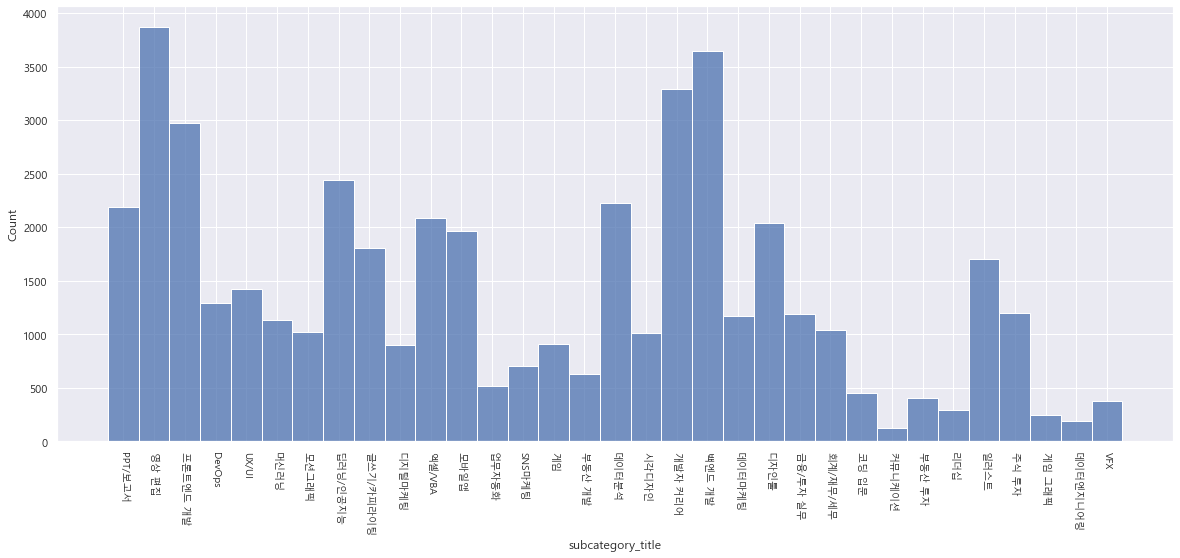

In [18]:
plt.figure(figsize=(20,8))
sns.histplot(data= df,  x='subcategory_title')
plt.xticks(rotation=-90, fontsize=10)
plt.show()

강의 개설의 시간적 추의

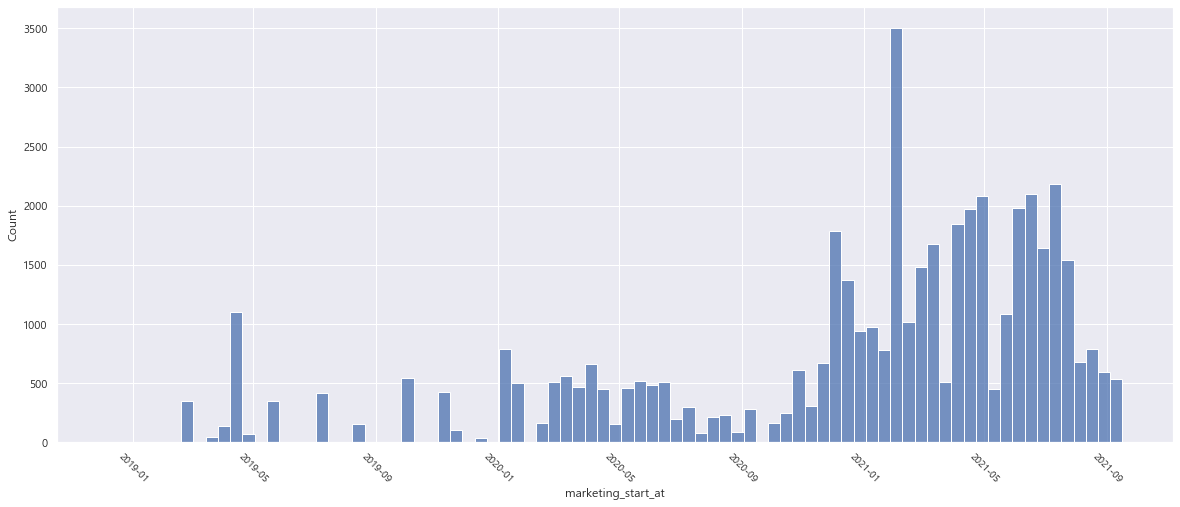

In [19]:
plt.figure(figsize=(20,8))
sns.histplot(data= df,  x='marketing_start_at')
plt.xticks(rotation=-45, fontsize=10)
plt.show()

### 결제수단 분석

구매시 결제 경로

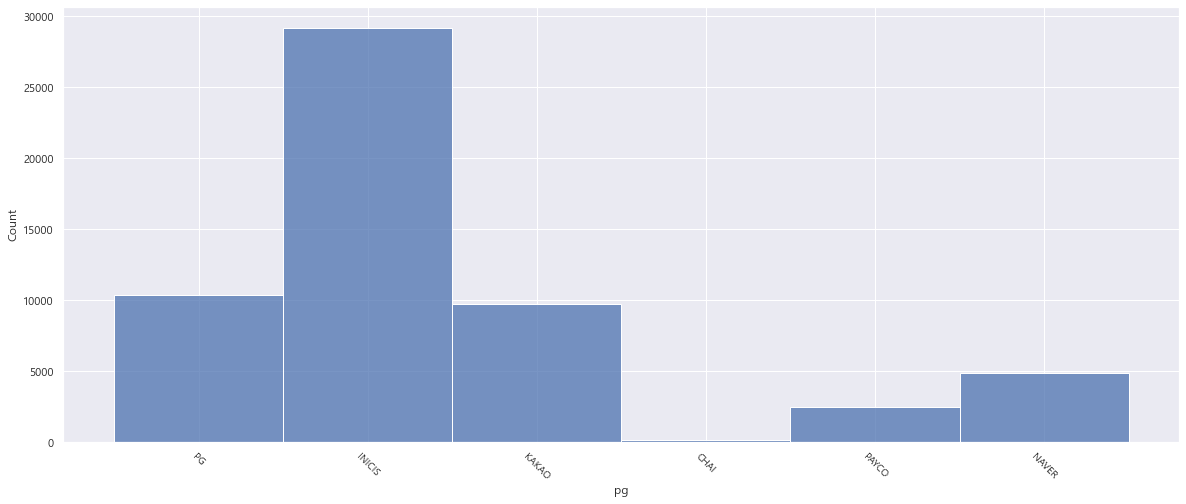

In [20]:
plt.figure(figsize=(20,8))
sns.histplot(data= df,  x='pg')
plt.xticks(rotation=-45, fontsize=10)
plt.show()

구매시 결제 수단

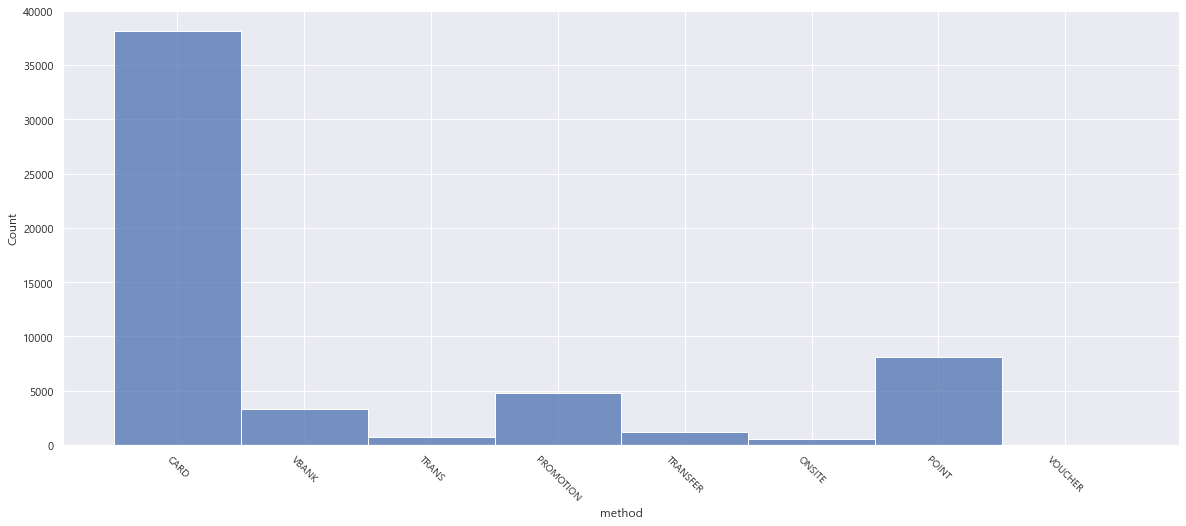

In [21]:
plt.figure(figsize=(20,8))
sns.histplot(data= df, x='method')
plt.xticks(rotation=-45, fontsize=10)
plt.show()

결제 경로와 수단 시각화

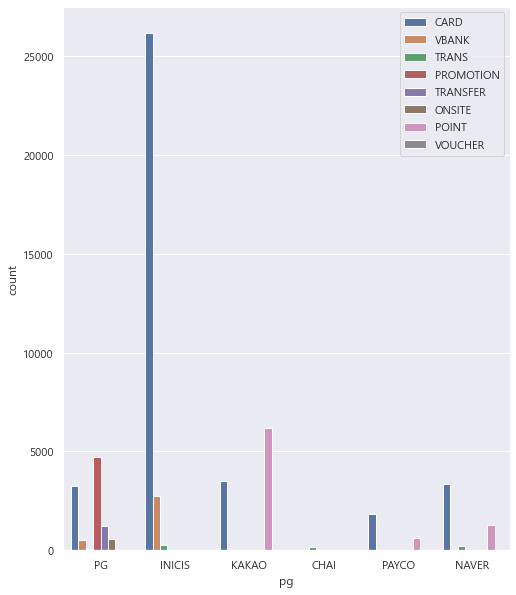

In [22]:
plt.figure(figsize=(8, 10))
sns.countplot(data=df, x='pg', hue='method')
plt.ticklabel_format(style='sci', axis='y')
plt.legend(loc='upper right')
plt.show()

상관계수로 분석

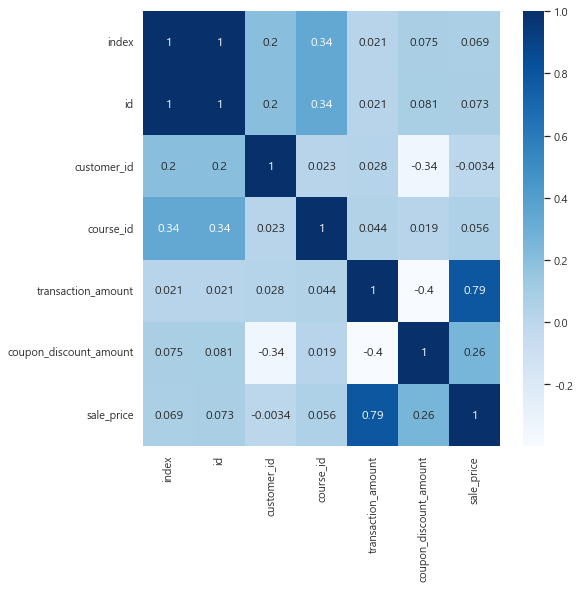

In [23]:
corr = df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(data = corr, cmap='Blues', annot=True)
plt.show()

쿠폰과 판매 수익과의 음의 상관관계 파악 가능

### format별 세부 내용 분석

format 안 'category_title'별 고객수, 수익

In [24]:
how = {
    'customer_id' : np.count_nonzero,
    'transaction_amount' : np.sum
}

df.groupby(['format','category_title']).agg(how)

customer_id  transaction_amount
format  category_title                                 
B2B     교육                        6            24347500
        데이터사이언스                  25           475971780
        마케팅                       3           124222500
        업무 생산성                    5            22025500
        크리에이티브                    6            59413500
        프로그래밍                   440            46747010
B2B 온라인 교육                      926          1135978045
        데이터사이언스                  15            65907774
        마케팅                       6             2760000
        부동산/금융                    5             2177500
        비즈니스                      1              360000
        업무 생산성                    1              480000
        크리에이티브                    9             3660000
        파이낸스                      1              480000
        프로그래밍                    20            16965000
B2G     마케팅                       1            20000000
        프로그래밍                   433             8921300
MBA     지식콘텐츠                    23             4970000
RED     데이터사이언스                 319            69105400
        마케팅                    1537           186580408
        업무 생산성                  110            17685000
        영상/3D                   278            44848400
        프로그래밍                  1139           163213155
관리      관리                        1              150000
스쿨      데이터사이언스                  79            14608693
        크리에이티브                    5            -2890833
        프로그래밍                   952           -13003206
스쿨 온라인  프로그래밍                   643            38529132
아카이브    크리에이티브                   35             1895700
온라인 완주반 데이터 사이언스                  5             1550000
        데이터사이언스                 369           105298520
        마케팅                     228            65202769
        비즈니스                      1              314000
        업무 생산성                  185            34225900
        크리에이티브                  339            77395418
        프로그래밍                   544           132878253
올인원     데이터사이언스                6508           771325932
        디자인                    6174           663198168
        마케팅                    3295           335400147
        부동산/금융                 2997           471823434
        비즈니스                     18             4620000
        업무 생산성                 5300           493982584
        영상/3D                  5241           499857805
        크리에이티브                  542           160690042
        투자/재테크                 1597           277706420
        파이낸스                     18             4620000
        프로그래밍                 14850          1313858001
이벤트     데이터사이언스                  19              814000
        마케팅                       7              440000
        부동산/금융                    4              242000
        크리에이티브                   18              892000
        프로그래밍                    41             2010000
캠프      데이터사이언스                  18            16320000
        부동산/금융                    6             1401500
        프로그래밍                     1             1350000
하루10분컷  비즈니스                      4               95865
        업무 생산성                 1367            26630441

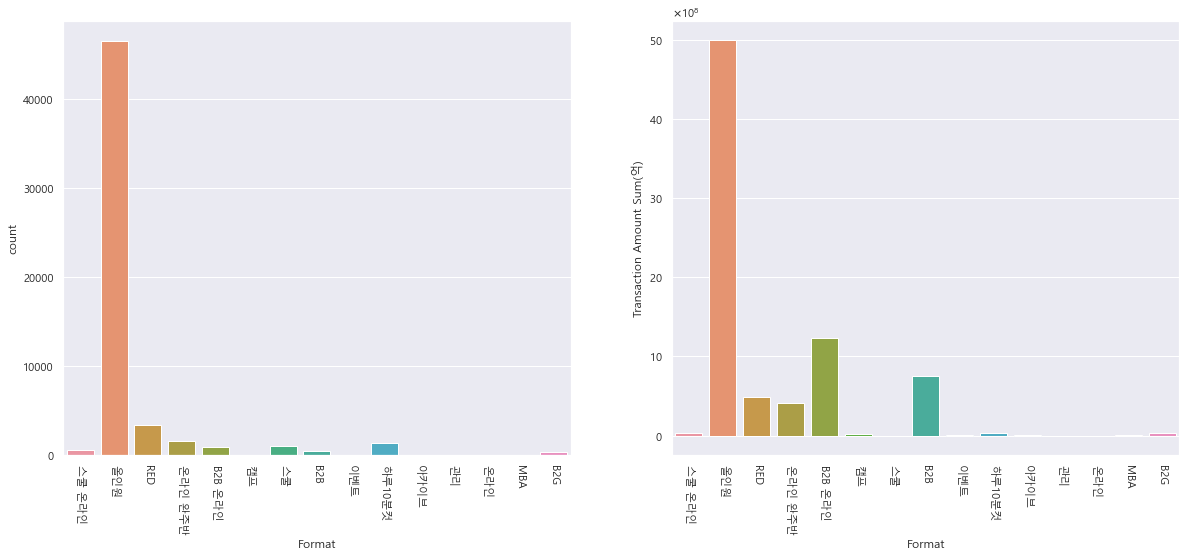

In [25]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='format')
plt.xticks(rotation=-90)
plt.xlabel('Format')


plt.subplot(1, 2, 2)
sns.barplot(data=df, x='format', y='transaction_amount',  ci=None, estimator=np.sum)
plt.xticks(rotation=-90)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.xlabel('Format')
plt.ylabel('Transaction Amount Sum(억)')

plt.show()

In [26]:
# 환불이 승인된 데이터프레임
cond_refund = (df['type']== 'REFUND') & (df['state'] == 'COMPLETED')

# 결제가 승인된 데이터 프레임
cond_payment = (df['type']== 'PAYMENT') & (df['state'] == 'COMPLETED')

# format별 환불 비율
format_refund_rate = []

# format array화
format_array = df['format'].unique()

for i in format_array:
    cond = (df['format'] == i)
    
    # 결제승인 == df[cond][cond_payment]
    # 환불승인 == df[cond][cond_refund]
    
    # 결제승인 갯수 = 전체 갯수
    payment = len(df[cond][cond_payment].index)
    # 환불승인 갯수
    refund = len(df[cond][cond_refund].index)

    # 환불율 계산
    if refund != 0 and payment != 0:
        refund_ratio = refund / payment * 100
    elif payment == 0:
        refund_ratio = 0
    refund_ratio = round(refund_ratio, 3)
    
    format_refund_rate.append(refund_ratio)
format_refund_rate = np.array(format_refund_rate)

C:\Users\LSH\AppData\Local\Temp\ipykernel_2808\3962860543.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  payment = len(df[cond][cond_payment].index)
C:\Users\LSH\AppData\Local\Temp\ipykernel_2808\3962860543.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  refund = len(df[cond][cond_refund].index)


In [27]:
# PAYMENT 금액 가져오기
temp_df = df
how = {
    'transaction_amount' : np.sum
}

cond = temp_df[temp_df['type']=='REFUND'].index
temp_df = temp_df.drop(cond)

payment_list = []

completed_only = temp_df.groupby(['format','type','state']).agg(how)
for i in range(len(completed_only)):
    payment_list.append(completed_only.iloc[i,0])
payment_list.insert(9,0)

# REFUND 금액 가져오기
temp_df = df

cond = temp_df[temp_df['type']=='PAYMENT'].index
temp_df = temp_df.drop(cond)

temp_df.groupby(['format','type','state']).agg(how)
refund_list = []

temp_df.groupby(['format','type','state']).agg(how)
for i in range(13):
    refund_list.append(temp_df.groupby(['format','type','state']).agg(how).iloc[i,0])
refund_list.insert(3,0)
refund_list.insert(5,0)

# 그래프용 데이터 df5
temp_df = pd.DataFrame(
    data = {'PAYMENT' : payment_list, 
            'REFUND' : refund_list},
    index = np.sort(df['format'].unique(), axis=0),
    columns=['PAYMENT','REFUND']
)
temp_df['transaction_amount_refund_rate'] = round((abs(temp_df['REFUND']) / (temp_df['PAYMENT'] ) *100), 2)
temp_df['format_refund_rate'] = np.round(format_refund_rate, 2)

temp_df

,PAYMENT,REFUND,transaction_amount_refund_rate,format_refund_rate
B2B,755932780,-3204990,0.42,6.81
B2B 온라인,1232648319,-3880000,0.31,7.05
B2G,31846300,-2925000,9.18,5.23
MBA,4970000,0,0.0,22.6
RED,509463500,-28031137,5.5,0.72
관리,150000,0,0.0,19.05
스쿨,14608693,-15894039,108.8,0.98
스쿨 온라인,42034660,-3505528,8.34,22.48
아카이브,2181900,-286200,13.12,8.54
온라인,0,-199000,inf,2.39


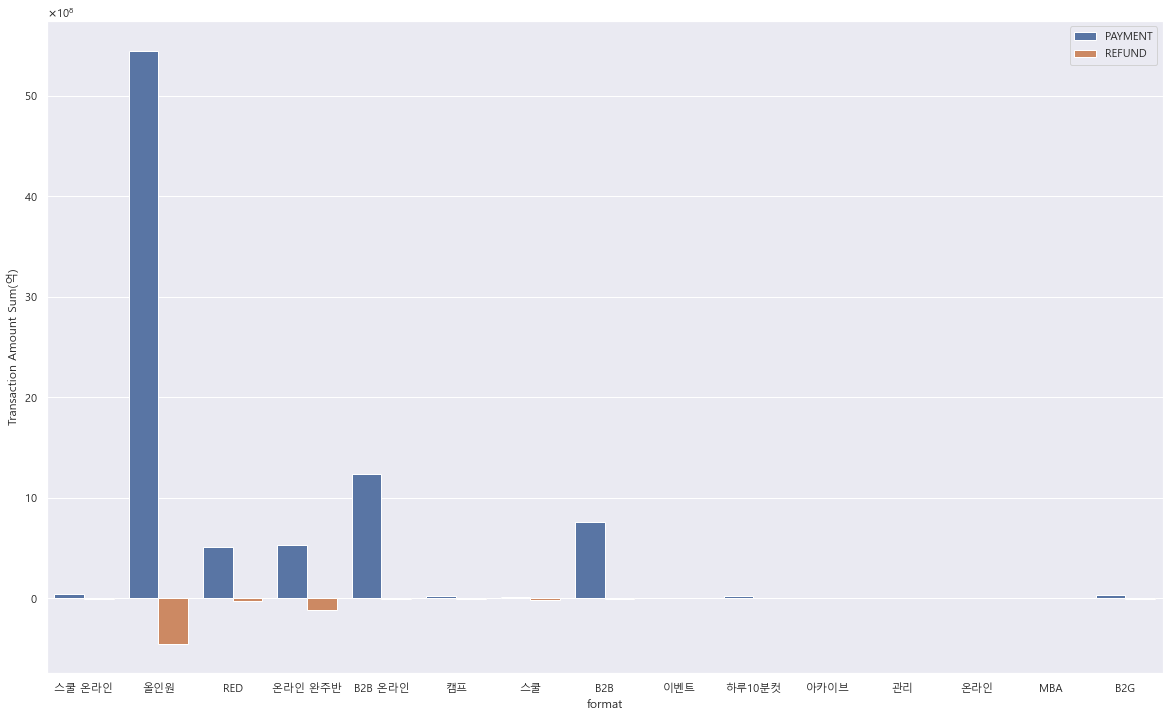

In [28]:
plt.figure(figsize=(20, 12))
sns.barplot(data=df, y='transaction_amount', x='format', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')
plt.show()

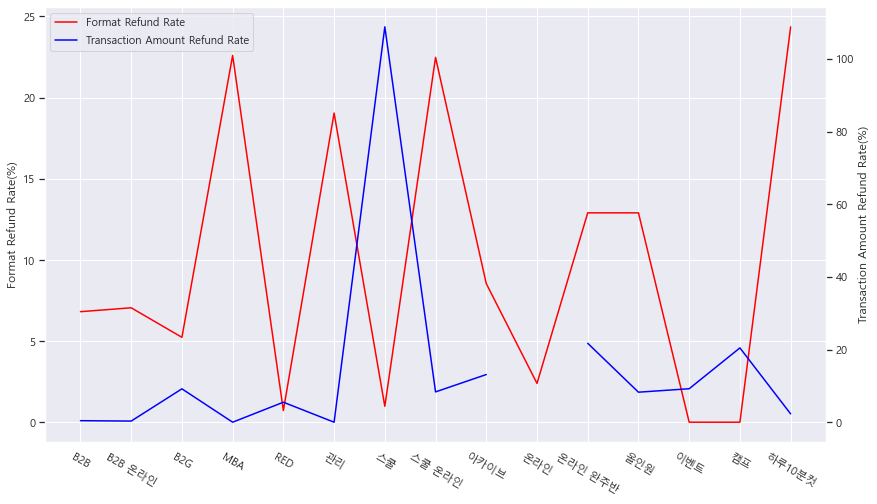

In [29]:
# df5 필요한 항목들을 -> array로 변환
format_array = np.array(temp_df.index)
format_refund_rate = np.array(temp_df['format_refund_rate'])
transaction_amount_refund_rate = np.array(temp_df['transaction_amount_refund_rate'])

fig = plt.figure(figsize=(14, 8))

ax = fig.add_subplot(111)
lns1 = ax.plot(format_array, format_refund_rate, color = 'red',  label='Format Refund Rate')
ax.set_ylabel('Format Refund Rate(%)')
plt.xticks(rotation=-30)

# ax2는 y2에 대한 그래프, twinx로 x축을 공유
ax2 = ax.twinx()
lns2 = ax2.plot(format_array, transaction_amount_refund_rate, color = 'blue', label='Transaction Amount Refund Rate')
ax2.set_ylabel('Transaction Amount Refund Rate(%)')
ax2.grid()

# 범뢰 같이 표현
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
plt.show()

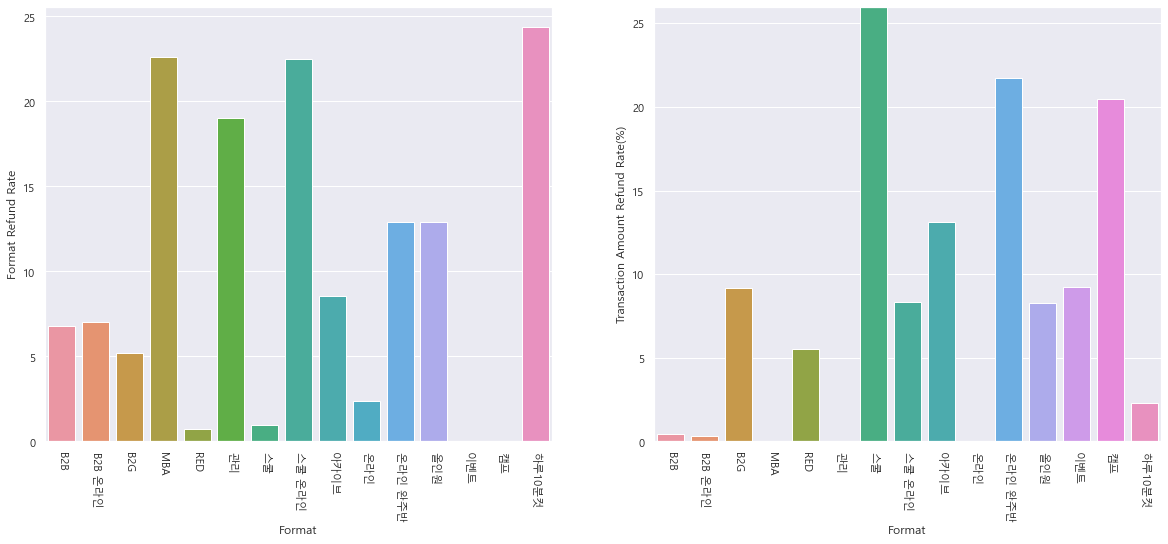

In [30]:
# df5 필요한 항목들을 -> array로 변환
format_array = np.array(temp_df.index)
format_refund_rate = np.array(temp_df['format_refund_rate'])
transaction_amount_refund_rate = np.array(temp_df['transaction_amount_refund_rate'])

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.barplot( x=format_array, y=format_refund_rate ,)
plt.xticks(rotation=-90)
plt.ylabel('Format Refund Rate')
plt.xlabel('Format')

plt.subplot(1, 2, 2)
sns.barplot(x=format_array, y=transaction_amount_refund_rate,  ci=None, estimator=np.sum)
plt.xticks(rotation=-90)
plt.xlabel('Format')
plt.ylabel('Transaction Amount Refund Rate(%)')
plt.ylim(0, 26)
plt.show()

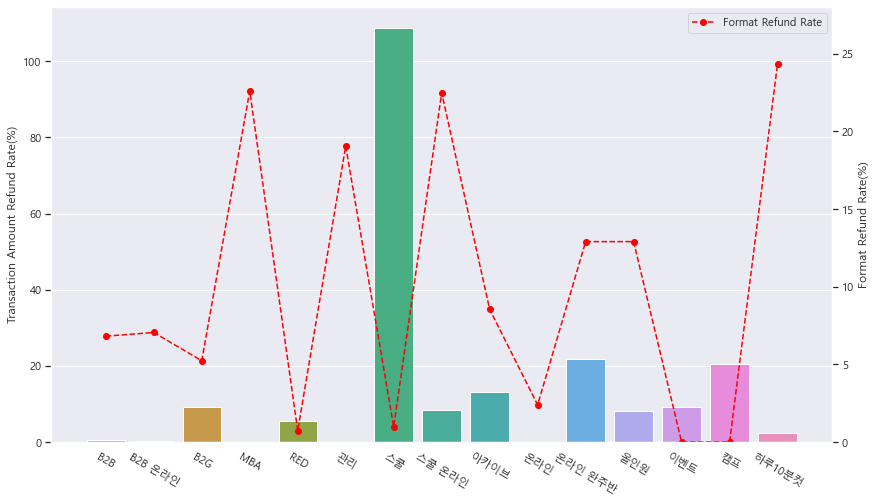

In [31]:
# df5 필요한 항목들을 -> array로 변환
format_array = np.array(temp_df.index)
format_refund_rate = np.array(temp_df['format_refund_rate'])
transaction_amount_refund_rate = np.array(temp_df['transaction_amount_refund_rate'])

plt.figure(figsize=(14, 8))

lns1 = sns.barplot(x=format_array, y=transaction_amount_refund_rate )

lns1.set_ylabel('Transaction Amount Refund Rate(%)')
plt.xticks(rotation=-30)

# ax2는 y2에 대한 그래프, twinx로 x축을 공유
ax2 = lns1.twinx()
lns2 = ax2.plot(format_array, format_refund_rate, color = 'red', label='Format Refund Rate',linestyle='--', marker='o')
ax2.set_ylabel('Format Refund Rate(%)')
ax2.grid()
ax2.legend(loc='upper right')
ax2.set_ylim(0, 28)
plt.show()

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


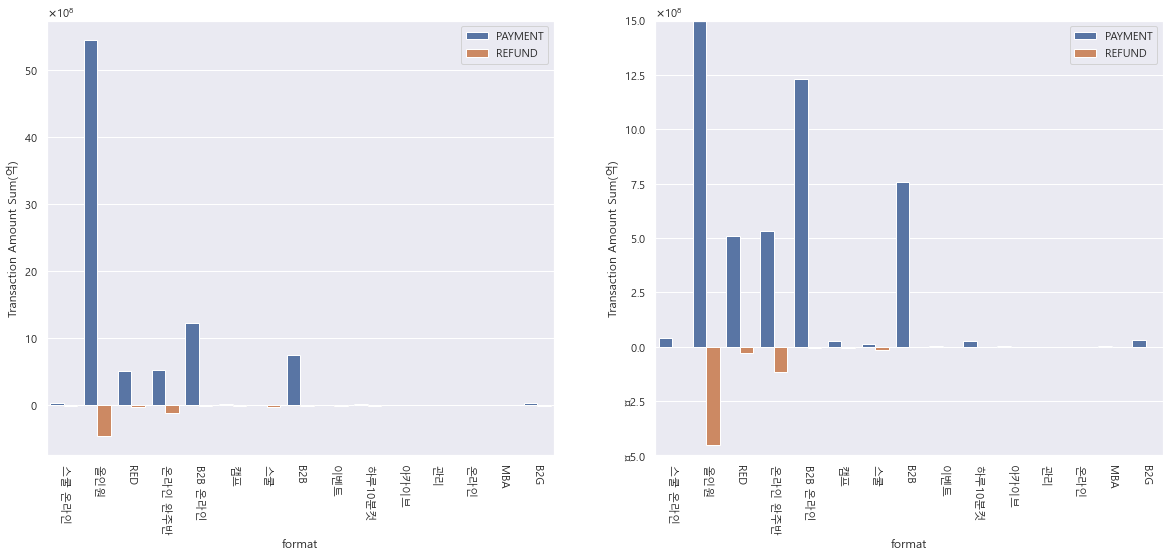

In [32]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.barplot(data=df, y='transaction_amount', x='format', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')
plt.xticks(rotation=-90)

plt.subplot(1, 2, 2)
sns.barplot(data=df, y='transaction_amount', x='format', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylim(-500000000, 1500000000)
plt.ylabel('Transaction Amount Sum(억)')
plt.xticks(rotation=-90)
plt.show()

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


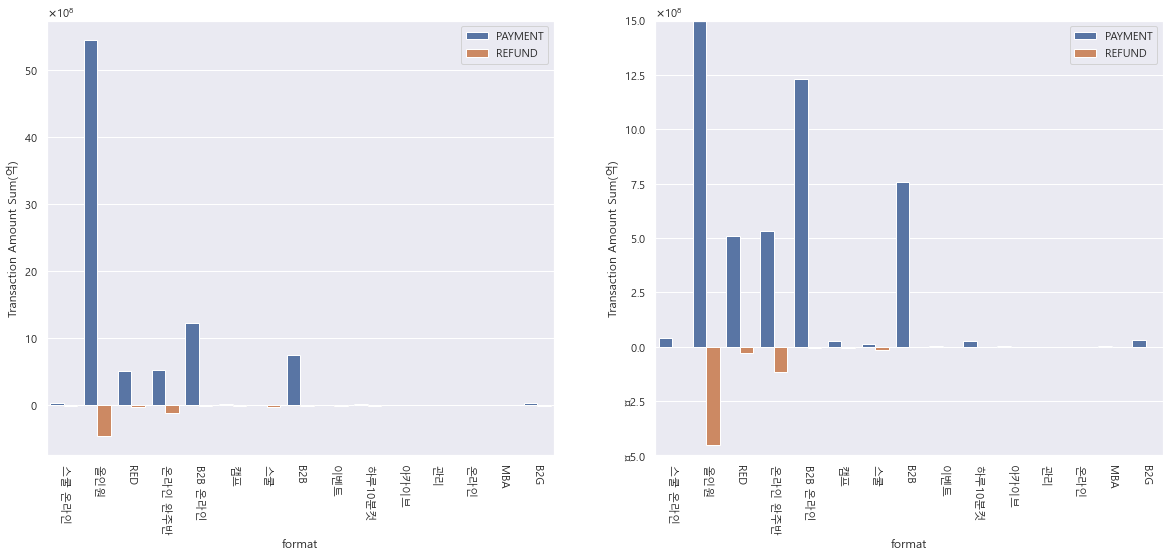

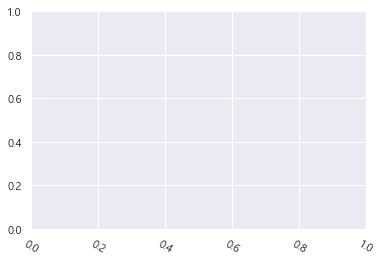

In [33]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
lns1 = sns.barplot(data=df, y='transaction_amount', x='format', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylabel('Transaction Amount Sum(억)')
plt.xticks(rotation=-90)

plt.subplot(1, 2, 2)
sns.barplot(data=df, y='transaction_amount', x='format', hue='type',  ci=None, estimator=np.sum)
plt.ticklabel_format(style='sci', axis='y', scilimits=(8,8), useMathText=True,)
plt.legend(loc='upper right')
plt.ylim(-500000000, 1500000000)
plt.ylabel('Transaction Amount Sum(억)')
plt.xticks(rotation=-90)
plt.show()


# df5 필요한 항목들을 -> array로 변환
format_array = np.array(temp_df.index)
format_refund_rate = np.array(temp_df['format_refund_rate'])
transaction_amount_refund_rate = np.array(temp_df['transaction_amount_refund_rate'])


lns1.set_ylabel('Transaction Amount Refund Rate(%)')
plt.xticks(rotation=-30)

# ax2는 y2에 대한 그래프, twinx로 x축을 공유
ax2 = lns1.twinx()
lns2 = ax2.plot(format_array, format_refund_rate, color = 'red', label='Format Refund Rate',linestyle='--', marker='o')
ax2.set_ylabel('Format Refund Rate(%)')
ax2.grid()
ax2.legend(loc='upper right')
ax2.set_ylim(0, 28)
plt.show()
